# ¿Qué son las LSTM y GRU?

Ambas son **redes neuronales recurrentes (RNN)** avanzadas diseñadas para **aprender de secuencias**, especialmente aquellas con **dependencias de largo plazo**, algo donde las RNN tradicionales fallan por el problema del **desvanecimiento/explosión del gradiente**.

## ¿Para qué sirven?

- Traducción automática
- Predicción de series temporales
- Generación de texto
- Reconocimiento de voz
- Modelado del lenguaje


# LSTM (Long Short-Term Memory)

## Objetivo:
Guardar información relevante a largo plazo y olvidar la irrelevante, mediante **memoria controlada** por compuertas.

##Componentes principales:

| Compuerta       | Fórmula                                                 | Función                                                                 |
|-----------------|----------------------------------------------------------|-------------------------------------------------------------------------|
| Olvido $f_t$    | $\sigma(W_f x_t + U_f h_{t-1} + b_f)$  Decide **cuánta información anterior** $c_{t-1}$ debe **olvidarse**     |
| Entrada $i_t$   | $\sigma(W_i x_t + U_i h_{t-1} + b_i)$                    | Decide **cuánta información nueva** guardar                            |
| Candidato $\tilde{c}_t$ | $\tanh(W_c x_t + U_c h_{t-1} + b_c)$           | Nueva información candidata a almacenar                                 |
| Celda $c_t$     | $f_t \odot c_{t-1} + i_t \odot \tilde{c}_t$             | **Memoria a largo plazo**, actualizada con olvido e ingreso             |
| Salida $o_t$    | $\sigma(W_o x_t + U_o h_{t-1} + b_o)$                    | Decide **cuánto de la celda** mostrar como salida                       |
| Estado oculto $h_t$ | $o_t \odot \tanh(c_t)$                             | Resultado final, usado como output y como input en el siguiente paso    |


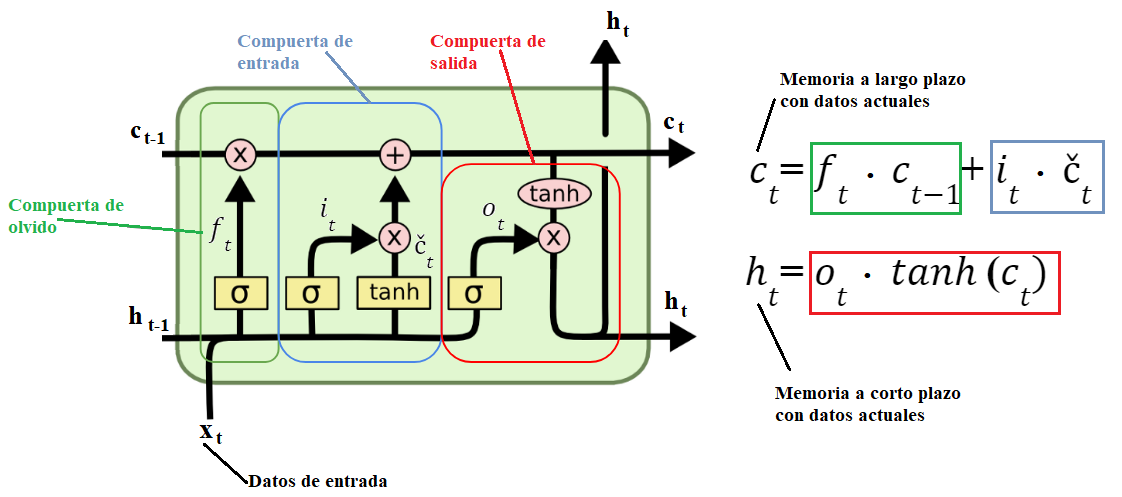

## Flujo paso a paso en una LSTM

Para cada instante de tiempo $t$:

1. **Entrada actual:** $x_t$
2. **Estado oculto anterior:** $h_{t-1}$
3. **Memoria anterior:** $c_{t-1}$

Se calcula:

### 1. Compuerta de olvido (Forget gate):
$$
f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)
$$
- Decide cuánto de la memoria anterior $c_{t-1}$ se conserva.

### 2. Compuerta de entrada:
$$
i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)
$$
- Decide cuánto de la nueva información guardar.

### 3. Candidato a nueva memoria:
$$
\tilde{c}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)
$$
- Representa la nueva información que podría entrar a la celda.

### 4. Actualización de la memoria:
$$
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$

### 5. Compuerta de salida:
$$
o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)
$$

### 6. Cálculo del estado oculto:
$$
h_t = o_t \odot \tanh(c_t)
$$

In [ ]:
import torch
import torch.nn as nn

class LSTMCellManual(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMCellManual, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_f = nn.Linear(input_size, hidden_size)
        self.U_f = nn.Linear(hidden_size, hidden_size, bias=False)

        self.W_i = nn.Linear(input_size, hidden_size)
        self.U_i = nn.Linear(hidden_size, hidden_size, bias=False)

        self.W_c = nn.Linear(input_size, hidden_size)
        self.U_c = nn.Linear(hidden_size, hidden_size, bias=False)

        self.W_o = nn.Linear(input_size, hidden_size)
        self.U_o = nn.Linear(hidden_size, hidden_size, bias=False)

    def forward(self, x, h_prev, c_prev):
        f = torch.sigmoid(self.W_f(x) + self.U_f(h_prev))
        i = torch.sigmoid(self.W_i(x) + self.U_i(h_prev))
        c_hat = torch.tanh(self.W_c(x) + self.U_c(h_prev))
        c = f * c_prev + i * c_hat
        o = torch.sigmoid(self.W_o(x) + self.U_o(h_prev))
        h = o * torch.tanh(c)

        # Mostrar cada paso
        print("x =", x)
        print("h_prev =", h_prev)
        print("c_prev =", c_prev)
        print("f (forget gate) =", f)
        print("i (input gate) =", i)
        print("c_hat (candidate) =", c_hat)
        print("c (new cell state) =", c)
        print("o (output gate) =", o)
        print("h (new hidden state) =", h)


        return h, c


In [ ]:
# Crear la celda
input_size = 3
hidden_size = 16
cell = LSTMCellManual(input_size, hidden_size)

# Simular una entrada
x = torch.randn(input_size)
h_prev = torch.zeros(hidden_size)
c_prev = torch.zeros(hidden_size)

# Ejecutar un paso
h, c = cell(x, h_prev, c_prev)

x = tensor([-2.3187,  1.0874,  2.7331])
h_prev = tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
c_prev = tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
f (forget gate) = tensor([0.1808, 0.6396, 0.6019, 0.8095, 0.1542, 0.2722, 0.3233, 0.9174, 0.5978,
        0.4270, 0.1934, 0.3217, 0.2762, 0.6737, 0.2409, 0.6640],
       grad_fn=<SigmoidBackward0>)
i (input gate) = tensor([0.1060, 0.5976, 0.6646, 0.0834, 0.0648, 0.4358, 0.8764, 0.1324, 0.4012,
        0.6775, 0.4988, 0.5514, 0.7784, 0.1213, 0.5620, 0.7261],
       grad_fn=<SigmoidBackward0>)
c_hat (candidate) = tensor([ 0.4715, -0.8248,  0.7567, -0.3887, -0.4028, -0.5109,  0.9221, -0.3313,
        -0.4795, -0.9917, -0.9188, -0.9888, -0.7614, -0.9656,  0.4424, -0.7885],
       grad_fn=<TanhBackward0>)
c (new cell state) = tensor([ 0.0500, -0.4929,  0.5029, -0.0324, -0.0261, -0.2227,  0.8082, -0.0439,
        -0.1924, -0.6719, -0.4583, -0.5453, -0.5927, -0.1171,  0.2486, -0.5726],
      

### LSTM con pytorch

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [seq_len, batch_size, input_size]
        print("x =", x)
        out, (h_n, c_n) = self.lstm(x)
        # Tomamos la salida del último tiempo
        final_out = out[:,-1,:]
        print("hidden states h_t =", out)
        print("c_n =", c_n)
        print("h_T",final_out)
        out = self.fc(final_out)

        return out


In [ ]:
# Parámetros
seq_len = 5
batch_size = 1
input_size = 3
hidden_size = 4
output_size = 5
num_layers=1

model = LSTMModel(input_size, hidden_size, output_size,num_layers)

# Simular una secuencia de entrada
x = torch.randn(batch_size,seq_len , input_size)

# Ejecutar el modelo
output = model(x)
print("Predicción final:", output)


x = tensor([[[-0.8342, -1.2509,  0.7831],
         [-0.9022, -2.6270,  0.2318],
         [ 0.7520,  0.4632, -1.1920],
         [-0.7649, -0.0050,  0.1281],
         [-0.7371, -0.1410, -0.3529]]])
hidden states h_t = tensor([[[-0.1624, -0.0636, -0.1799, -0.1051],
         [-0.2420, -0.1890, -0.1827, -0.0143],
         [-0.0729, -0.0559, -0.1591, -0.1098],
         [-0.1303,  0.0479, -0.1328, -0.2385],
         [-0.1597,  0.0829, -0.1025, -0.3029]]], grad_fn=<TransposeBackward0>)
c_n = tensor([[[-0.2500,  0.1852, -0.2380, -0.5349]]], grad_fn=<StackBackward0>)
h_T tensor([[-0.1597,  0.0829, -0.1025, -0.3029]], grad_fn=<SliceBackward0>)
Predicción final: tensor([[ 0.2804,  0.0760, -0.3517,  0.2856,  0.1722]],
       grad_fn=<AddmmBackward0>)


# GRU (Gated Recurrent Unit)
## Objetivo:
Ser una versión más **ligera** que LSTM, sin celda de memoria explícita, pero aún capaz de modelar dependencias largas.


## Componentes principales:

| Compuerta       | Fórmula                                                 | Función                                                                 |
|-----------------|----------------------------------------------------------|-------------------------------------------------------------------------|
| Actualización $z_t$ | $\sigma(W_z x_t + U_z h_{t-1} + b_z)$  Controla cuánto del estado anterior se **mantiene**                    |
| Reinicio $r_t$  | $\sigma(W_r x_t + U_r h_{t-1} + b_r)$                | Decide cuánto del pasado usar para **generar el nuevo estado**         |
| Candidato $\tilde{h}_t$ |$(\tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)$ | Genera un **nuevo estado candidato**                                   |
| Estado oculto $h_t$ | $(1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$ | Combina lo anterior con lo nuevo                                       |


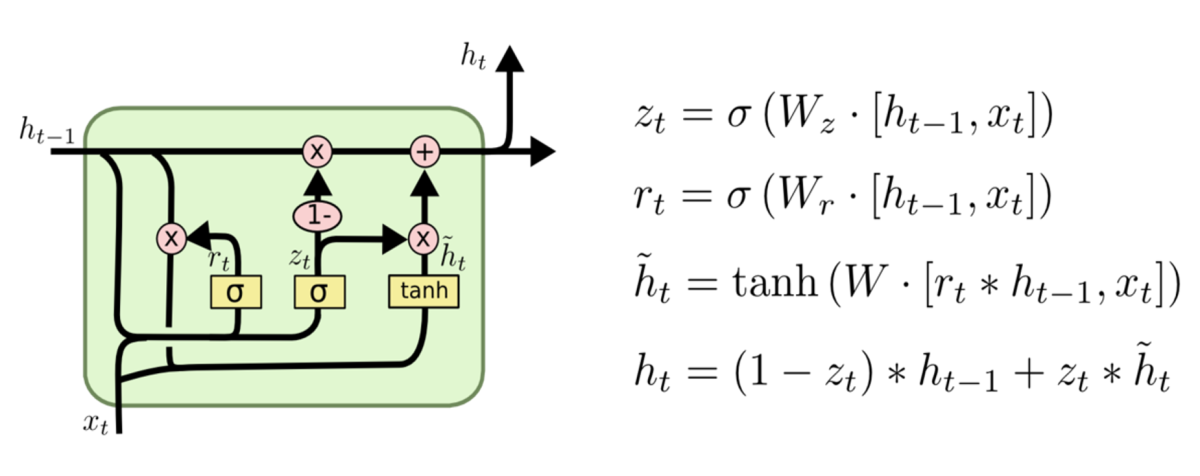

## Flujo paso a paso en una GRU

1. **Entrada actual:** $x_t$
2. **Estado oculto anterior:** $h_{t-1}$

Se calcula:

### 1. Compuerta de actualización:
$$
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
$$
- Controla cuánto se mantiene del pasado.

### 2. Compuerta de reinicio:
$$
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
$$
- Decide qué partes del pasado olvidar.

### 3. Candidato a nuevo estado:
$$
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
$$

### 4. Estado final:
$$
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
$$
- Si $z_t$ es alto, el nuevo estado sobrescribe al anterior.


In [ ]:
import torch
import torch.nn as nn

class GRUCellManual(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRUCellManual, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_z = nn.Linear(input_size, hidden_size)
        self.U_z = nn.Linear(hidden_size, hidden_size, bias=False)

        self.W_r = nn.Linear(input_size, hidden_size)
        self.U_r = nn.Linear(hidden_size, hidden_size, bias=False)

        self.W_h = nn.Linear(input_size, hidden_size)
        self.U_h = nn.Linear(hidden_size, hidden_size, bias=False)

    def forward(self, x, h_prev):
        z = torch.sigmoid(self.W_z(x) + self.U_z(h_prev))
        r = torch.sigmoid(self.W_r(x) + self.U_r(h_prev))
        h_hat = torch.tanh(self.W_h(x) + self.U_h(r * h_prev))
        h = (1 - z) * h_prev + z * h_hat

        # Mostrar los pasos
        print("x =", x)
        print("h_prev =", h_prev)
        print("z (update gate) =", z)
        print("r (reset gate) =", r)
        print("h_hat (candidate state) =", h_hat)
        print("h (new hidden state) =", h)

        return h


In [ ]:
# Parámetros
input_size = 3
hidden_size = 2

# Crear celda
cell = GRUCellManual(input_size, hidden_size)

# Entrada
x = torch.randn(input_size)
h_prev = torch.zeros(hidden_size)

# Ejecutar paso
h = cell(x, h_prev)


x = tensor([-1.4951, -0.6226,  0.0651])
h_prev = tensor([0., 0.])
z (update gate) = tensor([0.7011, 0.3273], grad_fn=<SigmoidBackward0>)
r (reset gate) = tensor([0.4969, 0.3692], grad_fn=<SigmoidBackward0>)
h_hat (candidate state) = tensor([0.0055, 0.5332], grad_fn=<TanhBackward0>)
h (new hidden state) = tensor([0.0038, 0.1745], grad_fn=<AddBackward0>)


# GRU con pytorch

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()

        self.gru = nn.GRU(input_size, hidden_size, num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        print("x:", x)
        out, h_n = self.gru(x)
        print("out:", out)
        print("h_n:", h_n)
        final_out = out[:,-1,:]
        print("final_out:", final_out)
        out = self.fc(final_out)
        return out


In [ ]:
# Parámetros
seq_len = 5
batch_size = 1
input_size = 3
hidden_size = 4
output_size = 2

model = GRUModel(input_size, hidden_size, output_size)

# Simular una secuencia de entrada
x = torch.randn(batch_size,seq_len , input_size)

# Ejecutar el modelo
output = model(x)
print("Predicción final:", output)


x: tensor([[[ 0.0774,  0.9311,  1.3619],
         [ 0.4786, -0.0250, -0.2022],
         [ 0.3233, -0.4198, -1.1013],
         [-1.7623,  0.6090, -1.2023],
         [ 0.0244,  1.3201, -0.7129]]])
out: tensor([[[ 0.1896, -0.1630,  0.0995, -0.4286],
         [ 0.2909, -0.1761, -0.0429, -0.4979],
         [ 0.1179, -0.0338, -0.2870, -0.3929],
         [-0.1200,  0.5896, -0.6053, -0.1813],
         [ 0.0492,  0.5851, -0.4139, -0.2956]]], grad_fn=<TransposeBackward1>)
h_n: tensor([[[ 0.0492,  0.5851, -0.4139, -0.2956]]], grad_fn=<StackBackward0>)
final_out: tensor([[ 0.0492,  0.5851, -0.4139, -0.2956]], grad_fn=<SliceBackward0>)
Predicción final: tensor([[-0.0915, -0.2752]], grad_fn=<AddmmBackward0>)


# Ejemplo serie de tiempo


This dataset contains the historical stock prices of Tesla Inc. (TSLA) from January 1, 2000, to March 2025. The data includes daily open, high, low, close prices, adjusted close prices, and trading volume. It is ideal for stock market analysis, time series forecasting, and financial research.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taimoor888/tesla-stock-price-data-2000-2025")

print("Path to dataset files:", path)

100%|██████████| 87.8k/87.8k [00:00<00:00, 45.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taimoor888/tesla-stock-price-data-2000-2025/versions/1


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv(path + "/tesla_stock_data_2000_2025.csv")
df = df.iloc[2:]
df.rename(columns={'Price':'date'},inplace=True)
df[['Close', 'High', 'Low','Open','Volume']] = df[['Close', 'High', 'Low','Open','Volume']].apply(pd.to_numeric, errors='coerce')
df['Volume'] = df['Volume'] / 1000000


scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Close', 'High', 'Low', 'Open']])  # Normalizar las características
df[['Close', 'High', 'Low', 'Open']] = data_scaled
df.head()


# Ordenar los datos por fecha (aún es importante si no están ordenados)
df = df.sort_values(by=['date'])

# Ahora dividir el dataframe manteniendo el orden temporal
train_size = int(len(df) * 0.8)  # 80% para entrenamiento
train_data = df[:train_size]     # Primer 80%
test_data = df[train_size:]


train_data.head()

,date,Close,High,Low,Open,Volume
2,2010-06-29,-0.746722,-0.745653,-0.750704,-0.749189,281.4945
3,2010-06-30,-0.746758,-0.742480,-0.747169,-0.745126,257.8065
4,2010-07-01,-0.747879,-0.745115,-0.749029,-0.745598,123.2820
5,2010-07-02,-0.749532,-0.746765,-0.749986,-0.746795,77.0970
6,2010-07-06,-0.751384,-0.748580,-0.751754,-0.748591,103.0035


In [ ]:
class WeatherDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        # Secuencias de entradas (todas las columnas excepto 'meantemp')
        x = self.data.iloc[idx:idx + self.seq_length][['Close', 'High', 'Low','Volume']].values
        # El siguiente valor de meantemp (es decir, la etiqueta)
        y = self.data.iloc[idx + self.seq_length]['Open']
        return torch.tensor(x, dtype=torch.float32), torch.tensor([y], dtype=torch.float32)

# Crear el dataset y el dataloader
dataset_train = WeatherDataset(train_data, 30)
dataloader_train = DataLoader(dataset_train, batch_size=16, shuffle=False)

dataset_test = WeatherDataset(test_data, 30)
dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)

# Ver cómo se ve un lote de datos
for sequences, labels in dataloader_train:
    print(f"Secuencias: {sequences.shape}")
    print(f"Etiquetas: {labels.shape}")
    break


Secuencias: torch.Size([16, 30, 4])
Etiquetas: torch.Size([16, 1])


### LSTM

In [ ]:
import torch.optim as optim

class LSTMModel2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel2, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):


        out, (h_n, c_n) = self.lstm(x)
        # Tomamos la salida del último tiempo

        final_out = out[:, -1, :]

        out = self.fc(final_out)

        return out


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

modelLSTM = LSTMModel2(input_size=4, hidden_size=64, output_size=1,num_layers=2).to(device)

def init_weights(m):
    if isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)  # Inicialización Xavier
            elif 'bias' in name:
                nn.init.zeros_(param)  # Inicializa los sesgos a cero

modelLSTM.apply(init_weights)

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(modelLSTM.parameters(), lr=0.0001)

# Entrenamiento
loss_list = []
epochs = 100

for epoch in range(epochs):
    modelLSTM.train()
    epoch_loss = 0.0  # acumulador del loss por epoch
    for sequences, labels in dataloader_train:
        # Forward
        outputs = modelLSTM(sequences.to(device))
        loss = criterion(outputs, labels.to(device))
        epoch_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Promedio de pérdida por epoch
    epoch_loss /= len(dataloader_train)
    loss_list.append(epoch_loss)

    # Imprimir solo una vez por epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


Epoch [10/100], Loss: 0.0384
Epoch [20/100], Loss: 0.0386
Epoch [30/100], Loss: 0.0589
Epoch [40/100], Loss: 0.0109
Epoch [50/100], Loss: 0.0088
Epoch [60/100], Loss: 0.0125
Epoch [70/100], Loss: 0.0071
Epoch [80/100], Loss: 0.0073
Epoch [90/100], Loss: 0.0048
Epoch [100/100], Loss: 0.0069


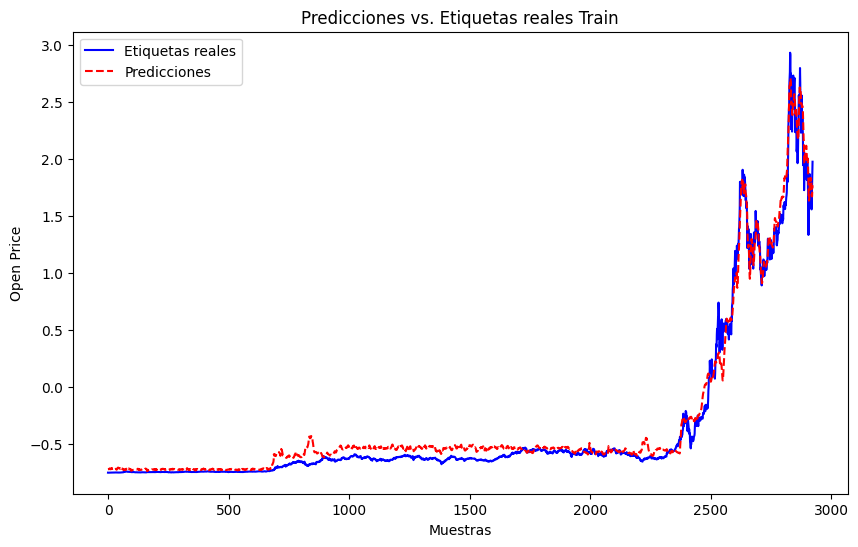

In [ ]:
import numpy as np

# Suponiendo que hayas acumulado las predicciones y etiquetas reales en listas
predictions = []
real_labels = []

with torch.no_grad():
    for sequences, labels in dataloader_train:
        outputs = modelLSTM(sequences.to(device))
        #print(sequences)
        #print(outputs)
        predictions.append(outputs.cpu().numpy())
        real_labels.append(labels.cpu().numpy())

# Convertir a arrays de numpy
predictions = np.concatenate(predictions, axis=0)
real_labels = np.concatenate(real_labels, axis=0)

# Graficar las predicciones vs. las etiquetas reales
plt.figure(figsize=(10, 6))
plt.plot(real_labels, label="Etiquetas reales", color='blue')
plt.plot(predictions, label="Predicciones", color='red', linestyle='--')
plt.legend()
plt.xlabel("Muestras")
plt.ylabel("Open Price")
plt.title("Predicciones vs. Etiquetas reales Train")
plt.show()

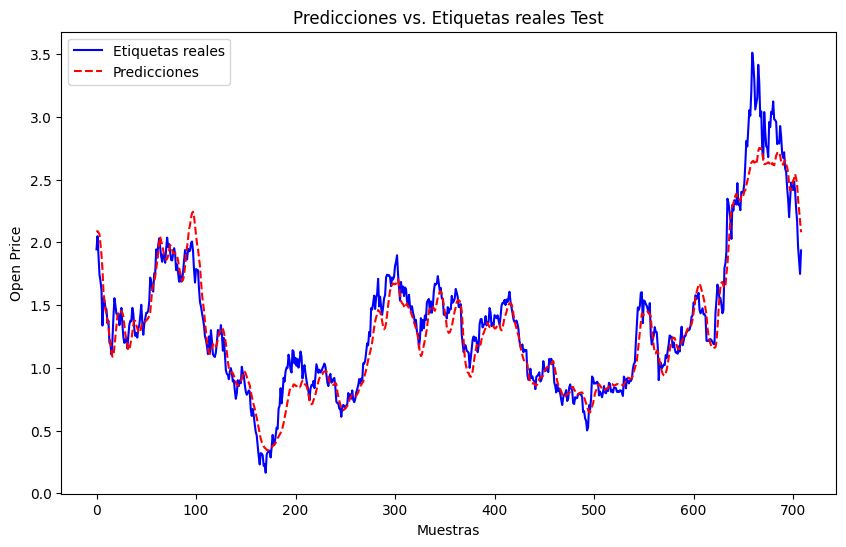

2.6317700086575417 %


In [ ]:
import numpy as np

# Suponiendo que hayas acumulado las predicciones y etiquetas reales en listas
predictions = []
real_labels = []
loss_test = []
with torch.no_grad():
    for sequences, labels in dataloader_test:
        outputs = modelLSTM(sequences.to(device))
        loss = criterion(outputs, labels.to(device))  # Flatten la salida para calcular la pérdida
        loss_test.append(loss.item())
        #print(sequences)
        #print(outputs)
        predictions.append(outputs.cpu().numpy())
        real_labels.append(labels.cpu().numpy())

# Convertir a arrays de numpy
predictions = np.concatenate(predictions, axis=0)
real_labels = np.concatenate(real_labels, axis=0)

# Graficar las predicciones vs. las etiquetas reales
plt.figure(figsize=(10, 6))
plt.plot(real_labels, label="Etiquetas reales", color='blue')
plt.plot(predictions, label="Predicciones", color='red', linestyle='--')
plt.legend()
plt.xlabel("Muestras")
plt.ylabel("Open Price")
plt.title("Predicciones vs. Etiquetas reales Test")
plt.show()
print(np.mean(loss_test) *100,"%" )

### GRU

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()

        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, h_n = self.gru(x)
        final_out = out[:, -1, :]
        out = self.fc(final_out)
        return out

# Crear y entrenar modelo GRU
model_gru = GRUModel(input_size=4, hidden_size=64, output_size=1, num_layers=2).to(device)
# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.0001)

loss_list_gru = []

# Entrenamiento
for epoch in range(epochs):
    model_gru.train()
    epoch_loss = 0.0  # acumulador del loss por epoch
    for sequences, labels in dataloader_train:
        # Forward
        outputs = model_gru(sequences.to(device))
        loss = criterion(outputs, labels.to(device))
        epoch_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Promedio de pérdida por epoch
    epoch_loss /= len(dataloader_train)
    loss_list_gru.append(epoch_loss)

    # Imprimir solo una vez por epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

Epoch [10/100], Loss: 0.1002
Epoch [20/100], Loss: 0.0313
Epoch [30/100], Loss: 0.0189
Epoch [40/100], Loss: 0.0110
Epoch [50/100], Loss: 0.0131
Epoch [60/100], Loss: 0.0075
Epoch [70/100], Loss: 0.0073
Epoch [80/100], Loss: 0.0084
Epoch [90/100], Loss: 0.0025
Epoch [100/100], Loss: 0.0108


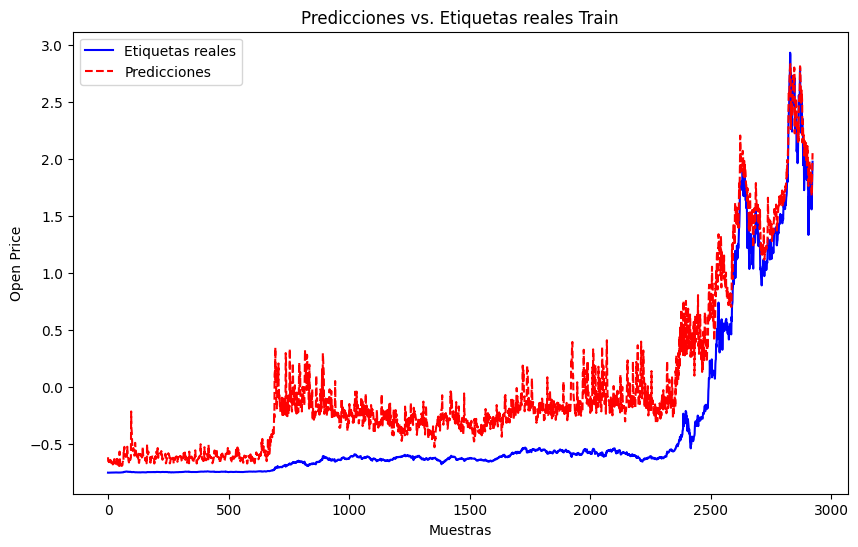

In [ ]:
import numpy as np

# Suponiendo que hayas acumulado las predicciones y etiquetas reales en listas
predictions = []
real_labels = []

with torch.no_grad():
    for sequences, labels in dataloader_train:
        outputs = model_gru(sequences.to(device))
        #print(sequences)
        #print(outputs)
        predictions.append(outputs.cpu().numpy())
        real_labels.append(labels.cpu().numpy())

# Convertir a arrays de numpy
predictions = np.concatenate(predictions, axis=0)
real_labels = np.concatenate(real_labels, axis=0)

# Graficar las predicciones vs. las etiquetas reales
plt.figure(figsize=(10, 6))
plt.plot(real_labels, label="Etiquetas reales", color='blue')
plt.plot(predictions, label="Predicciones", color='red', linestyle='--')
plt.legend()
plt.xlabel("Muestras")
plt.ylabel("Open Price")
plt.title("Predicciones vs. Etiquetas reales Train")
plt.show()

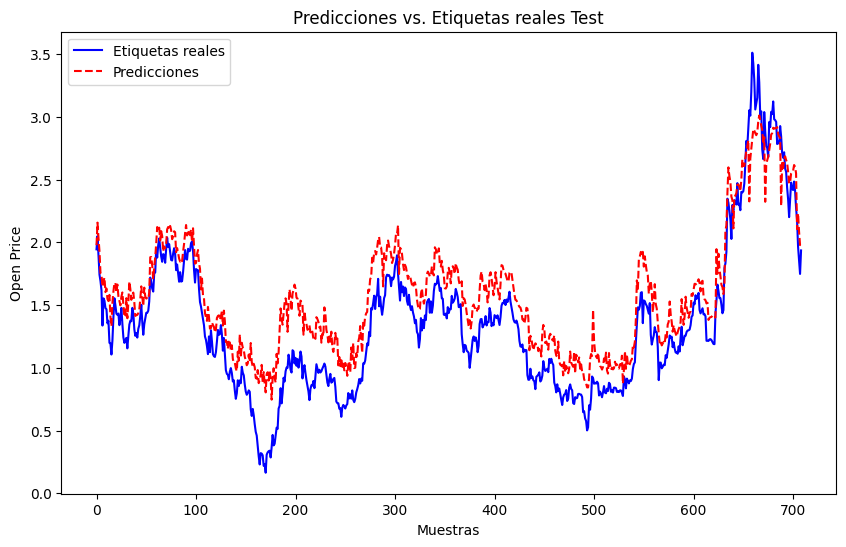

8.063423190679815 %


In [ ]:
import numpy as np

# Suponiendo que hayas acumulado las predicciones y etiquetas reales en listas
predictions = []
real_labels = []
loss_test = []
with torch.no_grad():
    for sequences, labels in dataloader_test:
        outputs = model_gru(sequences.to(device))
        loss = criterion(outputs, labels.to(device))  # Flatten la salida para calcular la pérdida
        loss_test.append(loss.item())
        #print(sequences)
        #print(outputs)
        predictions.append(outputs.cpu().numpy())
        real_labels.append(labels.cpu().numpy())

# Convertir a arrays de numpy
predictions = np.concatenate(predictions, axis=0)
real_labels = np.concatenate(real_labels, axis=0)

# Graficar las predicciones vs. las etiquetas reales
plt.figure(figsize=(10, 6))
plt.plot(real_labels, label="Etiquetas reales", color='blue')
plt.plot(predictions, label="Predicciones", color='red', linestyle='--')
plt.legend()
plt.xlabel("Muestras")
plt.ylabel("Open Price")
plt.title("Predicciones vs. Etiquetas reales Test")
plt.show()
print(np.mean(loss_test) *100,"%" )